Number of unique jobs: 1016
Sample Occupations:
                                 Title  \
0                     Chief Executives   
1        Chief Sustainability Officers   
2      General and Operations Managers   
3                          Legislators   
4  Advertising and Promotions Managers   

                                         Description  
0  Determine and formulate policies and provide o...  
1  Communicate and coordinate with management, sh...  
2  Plan, direct, or coordinate the operations of ...  
3  Develop, introduce, or enact laws and statutes...  
4  Plan, direct, or coordinate advertising polici...  

Task Type Distribution:
 Task Type
Core            13417
Supplemental     4222
Name: count, dtype: int64


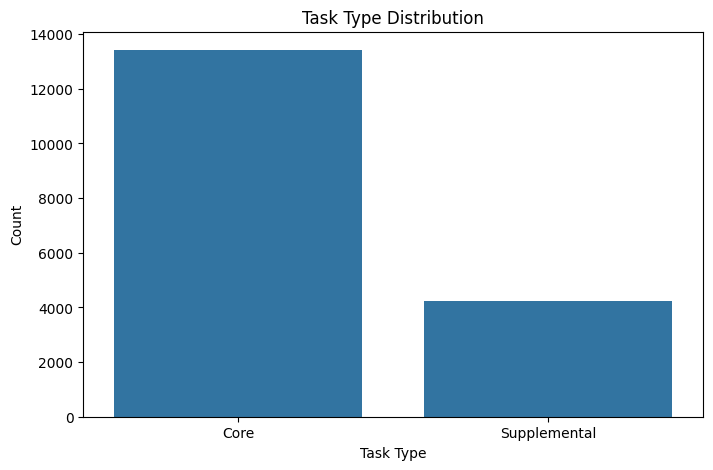


Average Importance of Work Activities: 3.15
Average Level of Work Activities: 3.31


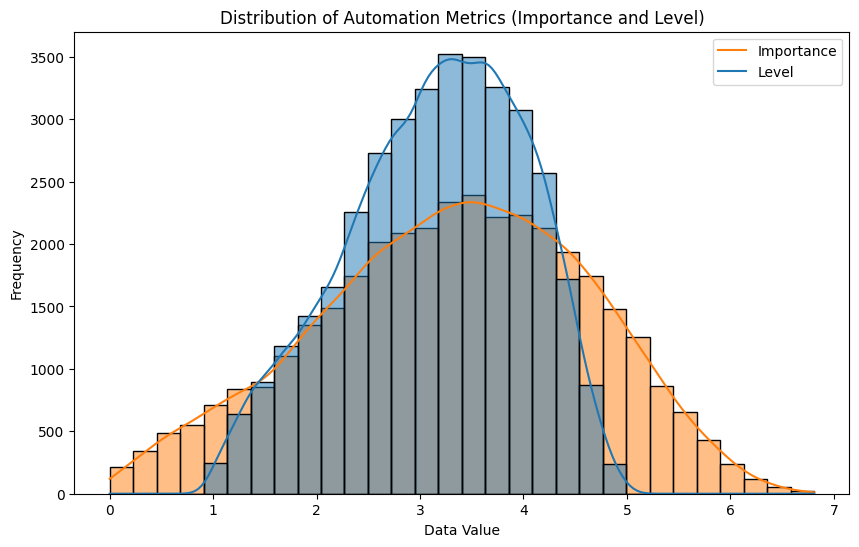


Average Importance of Abilities: 2.48


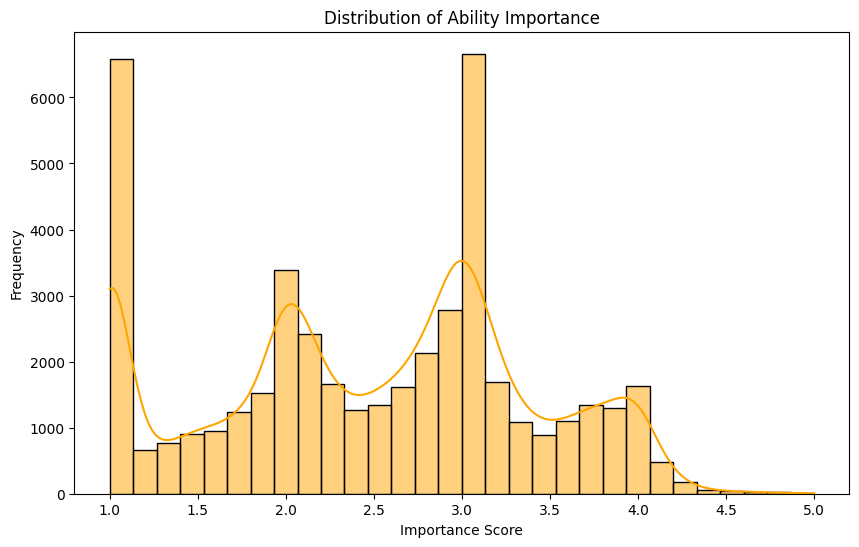


Top 10 Work Contexts by Importance:
 Empty DataFrame
Columns: [Element Name, Data Value]
Index: []


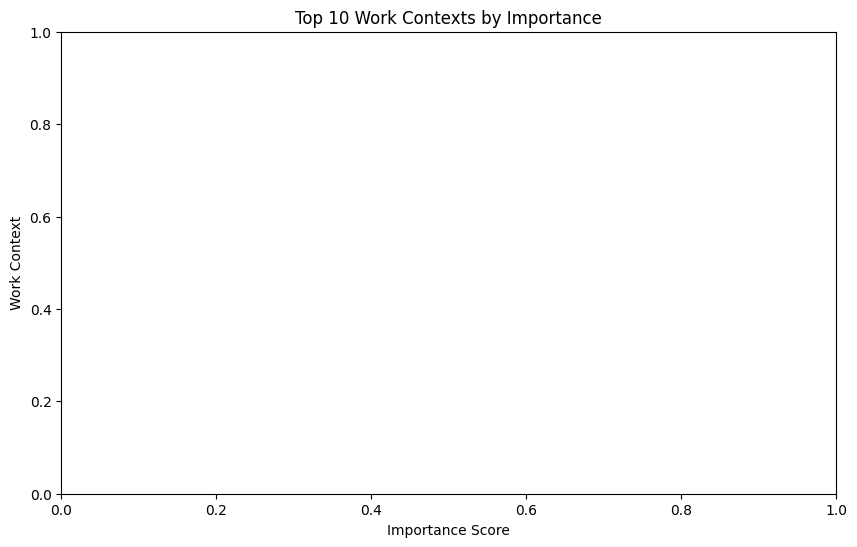


Summary of Key Metrics:
- Number of unique jobs: 1016
- Average Importance of Work Activities: 3.15
- Average Level of Work Activities: 3.31
- Average Importance of Abilities: 2.48


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to folder containing all Excel files (modify if necessary)
data_folder = "/content/"

# List of relevant files to load
relevant_files = [
    "Occupation Data.xlsx",
    "Task Statements.xlsx",
    "Work Activities.xlsx",
    "Abilities.xlsx",
    "Technology Skills.xlsx",
    "Work Context.xlsx",
    "Tools Used.xlsx"
]

# Function to load Excel files into DataFrames
def load_data(file_name):
    file_path = os.path.join(data_folder, file_name)
    try:
        excel_file = pd.ExcelFile(file_path)
        df = excel_file.parse(excel_file.sheet_names[0])
        return df
    except Exception as e:
        print(f"Error loading {file_name}: {e}")
        return None

# Load relevant files
dataframes = {file: load_data(file) for file in relevant_files}

# 1. Analyze Occupation Data
occupation_data = dataframes["Occupation Data.xlsx"]
print(f"Number of unique jobs: {occupation_data['Title'].nunique()}")
print(f"Sample Occupations:\n{occupation_data[['Title', 'Description']].head()}")

# 2. Analyze Tasks and Work Activities
tasks_data = dataframes["Task Statements.xlsx"]
work_activities = dataframes["Work Activities.xlsx"]

# Distribution of Task Types
task_type_counts = tasks_data["Task Type"].value_counts()
print("\nTask Type Distribution:\n", task_type_counts)

# Plot Task Type Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=task_type_counts.index, y=task_type_counts.values)
plt.title("Task Type Distribution")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.show()

# Automation Metrics (Importance and Level) in Work Activities
automation_metrics = work_activities[work_activities["Scale Name"].isin(["Importance", "Level"])]
avg_importance = automation_metrics[automation_metrics["Scale Name"] == "Importance"]["Data Value"].mean()
avg_level = automation_metrics[automation_metrics["Scale Name"] == "Level"]["Data Value"].mean()

print(f"\nAverage Importance of Work Activities: {avg_importance:.2f}")
print(f"Average Level of Work Activities: {avg_level:.2f}")

# Plot Distribution of Automation Metrics
plt.figure(figsize=(10, 6))
sns.histplot(automation_metrics, x="Data Value", hue="Scale Name", kde=True, bins=30)
plt.title("Distribution of Automation Metrics (Importance and Level)")
plt.xlabel("Data Value")
plt.ylabel("Frequency")
plt.legend(["Importance", "Level"])
plt.show()

# 4. Analyze Abilities
abilities = dataframes["Abilities.xlsx"]

# Average Importance of Abilities
abilities_importance = abilities[abilities["Scale Name"] == "Importance"]
avg_ability_importance = abilities_importance["Data Value"].mean()

print(f"\nAverage Importance of Abilities: {avg_ability_importance:.2f}")

# Distribution of Ability Importance
plt.figure(figsize=(10, 6))
sns.histplot(abilities_importance, x="Data Value", kde=True, bins=30, color="orange")
plt.title("Distribution of Ability Importance")
plt.xlabel("Importance Score")
plt.ylabel("Frequency")
plt.show()

# 5. Analyze Work Context
work_context = dataframes["Work Context.xlsx"]

# Contexts with Highest Automation Relevance
work_context_relevance = work_context[work_context["Scale Name"] == "Importance"]
top_work_contexts = work_context_relevance.nlargest(10, "Data Value")[["Element Name", "Data Value"]]
print("\nTop 10 Work Contexts by Importance:\n", top_work_contexts)

# Plot Top Work Contexts
plt.figure(figsize=(10, 6))
sns.barplot(x="Data Value", y="Element Name", data=top_work_contexts, palette="viridis")
plt.title("Top 10 Work Contexts by Importance")
plt.xlabel("Importance Score")
plt.ylabel("Work Context")
plt.show()

# Summary Output
print("\nSummary of Key Metrics:")
print(f"- Number of unique jobs: {occupation_data['Title'].nunique()}")
print(f"- Average Importance of Work Activities: {avg_importance:.2f}")
print(f"- Average Level of Work Activities: {avg_level:.2f}")
print(f"- Average Importance of Abilities: {avg_ability_importance:.2f}")


# New Section

In [ ]:
import pandas as pd
import os

# Define folder path
data_folder = "/content/"

# Load relevant files
occupation_file = os.path.join(data_folder, "Occupation Data.xlsx")
tasks_file = os.path.join(data_folder, "Task Statements.xlsx")
work_activities_file = os.path.join(data_folder, "Work Activities.xlsx")

# Load the datasets
occupation_data = pd.read_excel(occupation_file)
tasks_data = pd.read_excel(tasks_file)
work_activities = pd.read_excel(work_activities_file)

# Define weights for automation potential calculation
weights = {
    "Routine Tasks": 0.4,
    "Tech Readiness": 0.2,
    "Skill Complexity": 0.15,
    "Human Interaction": 0.15,
    "Education/Training": 0.1
}

# Combine task-related metrics for better granularity
tasks_with_activities = pd.merge(
    tasks_data, work_activities,
    on=["O*NET-SOC Code"],
    suffixes=("_task", "_activity")
)

# Example scoring logic using task-specific data
def calculate_task_automation_potential(task_row):
    # Routine Tasks (Importance score for routine-related work activities)
    routine_score = task_row["Data Value"] if task_row["Scale Name"] == "Importance" else 50

    # Technology Readiness (Placeholder or derived from task description/technology data)
    tech_readiness_score = 70 if "Software" in task_row["Task"] else 30

    # Skill Complexity (Inverse of activity "Level")
    skill_complexity_score = 100 - task_row["Data Value"] if task_row["Scale Name"] == "Level" else 50

    # Human Interaction (Placeholder or derived from work context data)
    human_interaction_score = 80 if "Communicate" in task_row["Task"] else 30

    # Education/Training (Placeholder for now, can link to relevant data)
    education_training_score = 90 if "Advanced" in task_row["Task"] else 40

    # Calculate weighted automation potential
    automation_potential = (
        routine_score * weights["Routine Tasks"] +
        tech_readiness_score * weights["Tech Readiness"] +
        skill_complexity_score * weights["Skill Complexity"] +
        human_interaction_score * weights["Human Interaction"] +
        education_training_score * weights["Education/Training"]
    )
    return round(automation_potential, 2), routine_score, tech_readiness_score, skill_complexity_score, human_interaction_score, education_training_score

# Generate main and breakdown tables
main_table = []
breakdown_table = []

# Iterate through tasks and calculate automation potential
for index, row in tasks_with_activities.iterrows():
    job_title = row["Title_task"]
    task_description = row["Task"]
    task_id = f"{row['O*NET-SOC Code']}_{row['Task ID']}"

    # Calculate automation potential and breakdown scores
    (
        automation_potential,
        routine_score,
        tech_readiness_score,
        skill_complexity_score,
        human_interaction_score,
        education_training_score
    ) = calculate_task_automation_potential(row)

    # Append to main table
    main_table.append([job_title, task_description, automation_potential, task_id])

    # Append to breakdown table
    breakdown_table.append([
        task_id, job_title, task_description, routine_score,
        tech_readiness_score, skill_complexity_score,
        human_interaction_score, education_training_score,
        automation_potential
    ])

# Convert to DataFrames for better visualization and export if needed
main_table_df = pd.DataFrame(main_table, columns=["Job Title", "Task Description", "Automation Potential", "Task ID"])
breakdown_table_df = pd.DataFrame(breakdown_table, columns=[
    "Task ID", "Job Title", "Task Description", "Routine (%)",
    "Tech Readiness (%)", "Skill Complexity (%)",
    "Human Interaction (%)", "Education/Training (%)",
    "Automation Potential (%)"
])

# Display main table
print("\nMain Table: Job Title, Task Description, Automation Potential, Task ID\n")
print(main_table_df.head())

# Display breakdown table
print("\nBreakdown Table: Task Metrics and Automation Potential\n")
print(breakdown_table_df.head())

# Optional: Save tables to CSV for further analysis
main_table_df.to_csv(os.path.join(data_folder, "main_table.csv"), index=False)
breakdown_table_df.to_csv(os.path.join(data_folder, "breakdown_table.csv"), index=False)



Main Table: Job Title, Task Description, Automation Potential, Task ID

          Job Title                                   Task Description  \
0  Chief Executives  Direct or coordinate an organization's financi...   
1  Chief Executives  Direct or coordinate an organization's financi...   
2  Chief Executives  Direct or coordinate an organization's financi...   
3  Chief Executives  Direct or coordinate an organization's financi...   
4  Chief Executives  Direct or coordinate an organization's financi...   

   Automation Potential          Task ID  
0                 23.82  11-1011.00_8823  
1                 48.77  11-1011.00_8823  
2                 23.70  11-1011.00_8823  
3                 48.72  11-1011.00_8823  
4                 23.69  11-1011.00_8823  

Breakdown Table: Task Metrics and Automation Potential

           Task ID         Job Title  \
0  11-1011.00_8823  Chief Executives   
1  11-1011.00_8823  Chief Executives   
2  11-1011.00_8823  Chief Executives   
3  11-1

In [ ]:
import pandas as pd

file_paths = {
    "Tools Used": "/content/Tools Used.xlsx",
    "Work Context": "/content/Work Context.xlsx",
    "Abilities": "/content/Abilities.xlsx",
    "Education, Training, and Experience": "/content/Education, Training, and Experience Categories.xlsx",
    "Technology Skills": "/content/Technology Skills.xlsx",
    "Work Activities": "/content/Work Activities.xlsx",
    "Task Statements": "/content/Task Statements.xlsx",
    "Skills": "/content/Skills.xlsx",
    "DWA Reference": "/content/DWA Reference.xlsx",
    "Task Ratings": "/content/Task Ratings.xlsx",
}

columns_to_use = {
    "Tools Used": ["O*NET-SOC Code", "Title", "Commodity Code", "Commodity Title"],
    "Work Context": ["O*NET-SOC Code", "Element ID", "Element Name", "Scale Name", "Data Value"],
    "Abilities": ["O*NET-SOC Code", "Element ID", "Element Name", "Scale Name", "Data Value"],
    "Education, Training, and Experience": ["Element ID", "Element Name", "Category", "Category Description"],
    "Technology Skills": ["O*NET-SOC Code", "Technology", "Commodity Title", "Hot Technology", "In Demand"],
    "Work Activities": ["O*NET-SOC Code", "Element ID", "Element Name", "Scale Name", "Data Value"],
    "Task Statements": ["O*NET-SOC Code", "Task ID", "Task", "Task Type"],
    "Skills": ["O*NET-SOC Code", "Element ID", "Element Name", "Scale Name", "Data Value"],
    "DWA Reference": ["Element ID", "Element Name", "DWA ID", "DWA Title"],
    "Task Ratings": ["O*NET-SOC Code", "Task ID", "Task", "Scale Name", "Data Value"],
}

dataframes = {}
for name, path in file_paths.items():
    try:
        df = pd.read_excel(path)
        dataframes[name] = df[[col for col in columns_to_use[name] if col in df.columns]]
    except Exception as e:
        print(f"Error loading {name}: {e}")

merged_data = pd.DataFrame()

if "Task Ratings" in dataframes and "Task Statements" in dataframes:
    task_ratings = dataframes["Task Ratings"]
    task_statements = dataframes["Task Statements"]
    merged_data = pd.merge(task_ratings, task_statements, on=["O*NET-SOC Code", "Task ID"], how="left")

for dataset_name in ["Work Activities", "Skills", "Abilities"]:
    if dataset_name in dataframes:
        df = dataframes[dataset_name]
        aggregated_df = (
            df.groupby(["O*NET-SOC Code", "Scale Name"])["Data Value"]
            .mean()
            .reset_index()
        )
        pivot_df = aggregated_df.pivot(index="O*NET-SOC Code", columns="Scale Name", values="Data Value")
        pivot_df.reset_index(inplace=True)
        merged_data = pd.merge(merged_data, pivot_df, on="O*NET-SOC Code", how="left")

if "Technology Skills" in dataframes:
    tech_skills = dataframes["Technology Skills"]
    tech_skills["Tech Readiness"] = tech_skills["Hot Technology"].apply(lambda x: 1 if x == "Y" else 0)
    tech_readiness = tech_skills.groupby("O*NET-SOC Code")["Tech Readiness"].mean().reset_index()
    merged_data = pd.merge(merged_data, tech_readiness, on="O*NET-SOC Code", how="left")

if "Tools Used" in dataframes:
    tools_used = dataframes["Tools Used"]
    tool_dependency = tools_used.groupby("O*NET-SOC Code")["Commodity Code"].count().reset_index()
    tool_dependency.columns = ["O*NET-SOC Code", "Tool Dependency"]
    merged_data = pd.merge(merged_data, tool_dependency, on="O*NET-SOC Code", how="left")

if "Work Context" in dataframes:
    work_context = dataframes["Work Context"]
    aggregated_context = (
        work_context.groupby(["O*NET-SOC Code", "Scale Name"])["Data Value"]
        .mean()
        .reset_index()
    )
    work_context_pivot = aggregated_context.pivot(index="O*NET-SOC Code", columns="Scale Name", values="Data Value")
    work_context_pivot.reset_index(inplace=True)
    merged_data = pd.merge(merged_data, work_context_pivot, on="O*NET-SOC Code", how="left")

output_path = "/content/aggregated_dataset.csv"
merged_data.to_csv(output_path, index=False)
print(f"Aggregated dataset saved to {output_path}")


Aggregated dataset saved to /content/aggregated_dataset.csv


In [ ]:
import pandas as pd

def add_automatability_column(file_path, output_path):
    """
    Adds an "automatability" column to the dataset based on weighted factors.

    Args:
        file_path (str): Path to the updated aggregated dataset.
        output_path (str): Path to save the updated dataset with the automatability column.

    Returns:
        str: Path to the updated file with the automatability column.
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Define weights for each column
    weights = {
        'Tech Readiness': 0.3,
        'Tool Dependency': 0.2,
        'Context': -0.1,  # Negative weight, as higher context dependency reduces automation likelihood
        'Importance': -0.2,
        'Level': -0.2,
        'Task Type': 0.4,  # Supplemental tasks (1) are more automatable
    }

    # Ensure necessary columns exist in the dataset
    required_columns = weights.keys()
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Normalize the relevant columns for consistency
    for col in required_columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

    # Calculate the automatability score
    df['Automatability Score'] = (
        df['Tech Readiness'] * weights['Tech Readiness'] +
        df['Tool Dependency'] * weights['Tool Dependency'] +
        df['Context'] * weights['Context'] +
        df['Importance'] * weights['Importance'] +
        df['Level'] * weights['Level'] +
        df['Task Type'] * weights['Task Type']
    )

    # Determine the threshold for binary classification
    threshold = 0.5
    df['Automatability'] = (df['Automatability Score'] > threshold).astype(int)

    # Drop the score column (optional, only for intermediate calculation)
    df.drop(columns=['Automatability Score'], inplace=True)

    # Save the updated dataset
    df.to_csv(output_path, index=False)
    return output_path

# Apply the function to the provided dataset
updated_file_path = '/content/converted_aggregated_dataset.csv'
output_file_path = '/content/aggregated_with_automatability.csv'
result_file_path = add_automatability_column(updated_file_path, output_file_path)

result_file_path


'/content/aggregated_with_automatability.csv'

In [ ]:
import pandas as pd
import numpy as np

def calculate_automatability(df):
    """
    Calculates the automatability score for each task based on relevant columns.
    The result is bounded between 0 and 1.

    Args:
        df (pd.DataFrame): The input DataFrame containing the relevant columns.

    Returns:
        pd.DataFrame: The DataFrame with an added 'Automatability' column.
    """
    # Normalizing columns to ensure they're on comparable scales
    df['Tech Readiness Norm'] = df['Tech Readiness'] / df['Tech Readiness'].max()
    df['Tool Dependency Norm'] = df['Tool Dependency'] / df['Tool Dependency'].max()
    df['Context Norm'] = df['Context'] / df['Context'].max()
    df['Importance Norm'] = df['Importance'] / df['Importance'].max()
    df['Level Norm'] = df['Level'] / df['Level'].max()

    # Mapping task type to numerical if it's not already (0 for Core, 1 for Supplemental)
    if df['Task Type'].dtype != 'int':
        df['Task Type'] = df['Task Type'].map({'Core': 0, 'Supplemental': 1}).fillna(1)

    # Define weights for each column
    weights = {
        'Tech Readiness Norm': 0.35,
        'Tool Dependency Norm': 0.25,
        'Context Norm': 0.25,
        'Importance Norm': 0.2,
        'Level Norm': 0.2,
        'Task Type': 0.05  # Lower weight for task type
    }

    # Calculate automatability score
    df['Automatability'] = (
        weights['Tech Readiness Norm'] * df['Tech Readiness Norm'] +
        weights['Tool Dependency Norm'] * df['Tool Dependency Norm'] +
        weights['Context Norm'] * (1 - df['Context Norm']) +  # Inverted context score
        weights['Importance Norm'] * (1 - df['Importance Norm']) +  # Inverted importance score
        weights['Level Norm'] * df['Level Norm'] +
        weights['Task Type'] * df['Task Type']
    )

    # Ensure the score is bounded between 0 and 1
    df['Automatability'] = df['Automatability'].clip(lower=0, upper=1)

    # Drop intermediate normalized columns
    df.drop(columns=['Tech Readiness Norm', 'Tool Dependency Norm', 'Context Norm',
                     'Importance Norm', 'Level Norm'], inplace=True)

    return df

# Load the converted dataset
converted_dataset_path = "/content/aggregated_dataset_with_occupation.csv"
df = pd.read_csv(converted_dataset_path)

# Apply the function to calculate automatability
df_with_automatability = calculate_automatability(df)

# Save the updated dataset
updated_dataset_path = "/content/1updated_aggregated_dataset_with_automatability.csv"
df_with_automatability.to_csv(updated_dataset_path, index=False)

updated_dataset_path


'/content/1updated_aggregated_dataset_with_automatability.csv'

In [ ]:
# Define the mapping of O*NET-SOC Codes to categories based on their prefix
categories = {
    "11-0000": "Management Occupations",
    "13-0000": "Business and Financial Operations Occupations",
    "15-0000": "Computer and Mathematical Occupations",
    "17-0000": "Architecture and Engineering Occupations",
    "19-0000": "Life, Physical, and Social Science Occupations",
    "21-0000": "Community and Social Service Occupations",
    "23-0000": "Legal Occupations",
    "25-0000": "Educational Instruction and Library Occupations",
    "27-0000": "Arts, Design, Entertainment, Sports, and Media Occupations",
    "29-0000": "Healthcare Practitioners and Technical Occupations",
    "31-0000": "Healthcare Support Occupations",
    "33-0000": "Protective Service Occupations",
    "35-0000": "Food Preparation and Serving Related Occupations",
    "37-0000": "Building and Grounds Cleaning and Maintenance Occupations",
    "39-0000": "Personal Care and Service Occupations",
    "41-0000": "Sales and Related Occupations",
    "43-0000": "Office and Administrative Support Occupations",
    "45-0000": "Farming, Fishing, and Forestry Occupations",
    "47-0000": "Construction and Extraction Occupations",
    "49-0000": "Installation, Maintenance, and Repair Occupations",
    "51-0000": "Production Occupations",
    "53-0000": "Transportation and Material Moving Occupations",
    "55-0000": "Military Specific Occupations",
}

# Add a category column to the dataset
merged_with_occupation["Category"] = merged_with_occupation["O*NET-SOC Code"].str[:2] + "-0000"
merged_with_occupation["Category"] = merged_with_occupation["Category"].map(categories)

# Create a dictionary to hold DataFrames for each category
category_dataframes = {
    category: merged_with_occupation[merged_with_occupation["Category"] == category]
    for category in categories.values()
}

# Save each category's DataFrame to a separate CSV file
output_files = {}
for category, df in category_dataframes.items():
    if not df.empty:
        file_path = f"/mnt/data/{category.replace(' ', '_')}.csv"
        df.to_csv(file_path, index=False)
        output_files[category] = file_path

output_files
